# Keywords

- **Peptides:** Peptides are short chains of amino acids that are the building blocks of proteins.
- **Previous amino acid:** The "previous amino acid" refers to the amino acid that comes before a specific amino acid in a peptide sequence.
- **K or R:** These are specific amino acids.
- **K:** K stands for lysine
- **R:** R stands for arginine
- **SPP:** Stands for `Plasmodium proteins signal peptide peptidase` - is an enzyme found in malaria-causing parasites called Plasmodium. Its job is to remove specific "signal peptides" from newly made proteins as they are being processed inside the parasite's cells.
- **NAT:** stands for `N-acetyltransferase` - N-acetyltransferase (NAT) is an enzyme that helps modify different substances inside living organisms. It transfers a small molecule called an acetyl group to other molecules, changing their properties... NATs are involved in a wide range of biological processes, including the metabolism of drugs, toxins, and endogenous compounds in organisms. They play a role in detoxification by modifying and facilitating the elimination of certain substances from the body.
- **Signal Peptides:** Signal peptides are like addresses that guide the proteins to the right place within the parasite's cells. Once the proteins reach their destination, SPP cuts off these signal peptides, allowing the proteins to function properly.
- **Research question 4:** In what peptides does the previous amino acid not = K or R... does this differ between SPP vs. NAT?

                                  Experiment name Biological sample category   
0      SPP vs. NAT coIP results recieved 11.15.22                        SPP  \
1      SPP vs. NAT coIP results recieved 11.15.22                        SPP   
2      SPP vs. NAT coIP results recieved 11.15.22                        SPP   
3      SPP vs. NAT coIP results recieved 11.15.22                        SPP   
4      SPP vs. NAT coIP results recieved 11.15.22                        SPP   
...                                           ...                        ...   
19259    SPP vs. NAT coIP results recieved 1.9.23                        NAT   
19260    SPP vs. NAT coIP results recieved 1.9.23                        NAT   
19261    SPP vs. NAT coIP results recieved 1.9.23                        NAT   
19262    SPP vs. NAT coIP results recieved 1.9.23                        NAT   
19263    SPP vs. NAT coIP results recieved 1.9.23                        NAT   

                                       

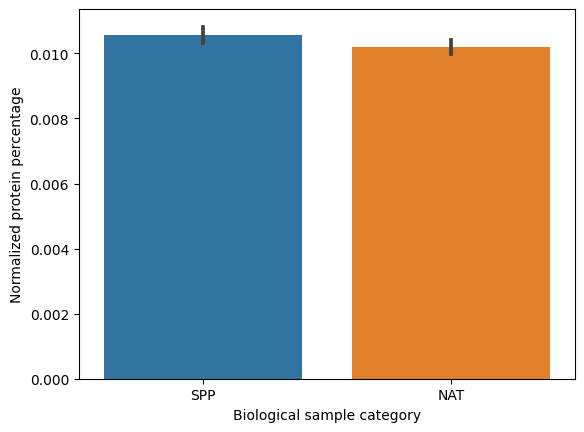

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

# Load the dataset
data = pd.read_excel('Malaria_Research_Data.xlsx', header=0)

# calculate the total protein spectra in each sample 
total_spectra = data.groupby('Biological sample category')['Protein percentage of total spectra'].sum()

# Normalize the protein percentages within each group
data['Normalized protein percentage'] = data.groupby('Biological sample category')['Protein percentage of total spectra'].transform(lambda x: (x / x.sum()) * 100)

# Calculate the corrected normalized protein percentage
data['Corrected normalized protein percentage'] = data.groupby('Biological sample category')['Normalized protein percentage'].transform(lambda x: (x / x.sum()) * 100)

# print the modified dataset 
print(data)

# Perform further analysis or visualization as desired
# For example, you can create a bar plot to compare the normalized protein percentage between SPP and NAT samples
sns.barplot(data=data, x='Biological sample category', y='Normalized protein percentage')
plt.show()

In [21]:
# Filter the dataset to include only the relevant columns for analysis, such as "Biological sample category," "Peptide sequence," "Previous amino acid,"
relevant_columns = ['Biological sample category', 'Peptide sequence', 'Previous amino acid']
filtered_data = data[relevant_columns]

In [30]:
# Filter the peptides where the previous amino acid is not equal to K or R.
filtered_data = filtered_data[(filtered_data['Previous amino acid'] != 'K') & (filtered_data['Previous amino acid'] != 'R')]

print(filtered_data)

      Biological sample category                 Peptide sequence   
0                            SPP                         TNLNVNKK  \
1                            SPP                         TNLNVNKK   
2                            SPP                         TNLNVNKK   
59                           SPP                   MKLNISNPLNNVQK   
60                           SPP                   MKLNISNPLNNVQK   
...                          ...                              ...   
19003                        NAT                   AEQFTEDIGVVNKR   
19004                        NAT                   AEQFTEDIGVVNKR   
19125                        NAT  IDDPINMSSMVGPVLNNDMNTINNNVTSNKK   
19126                        NAT                 NKHINENLAIIDNISK   
19197                        NAT                   ADRYENQVENELGK   

      Previous amino acid  
0                       ?  
1                       ?  
2                       ?  
59                      -  
60                      -  
...

In [23]:
# Split the filtered data into two groups based on the "Biological sample category" (SPP and NAT).
spp_data = filtered_data[filtered_data['Biological sample category'] == 'SPP']
nat_data = filtered_data[filtered_data['Biological sample category'] == 'NAT']

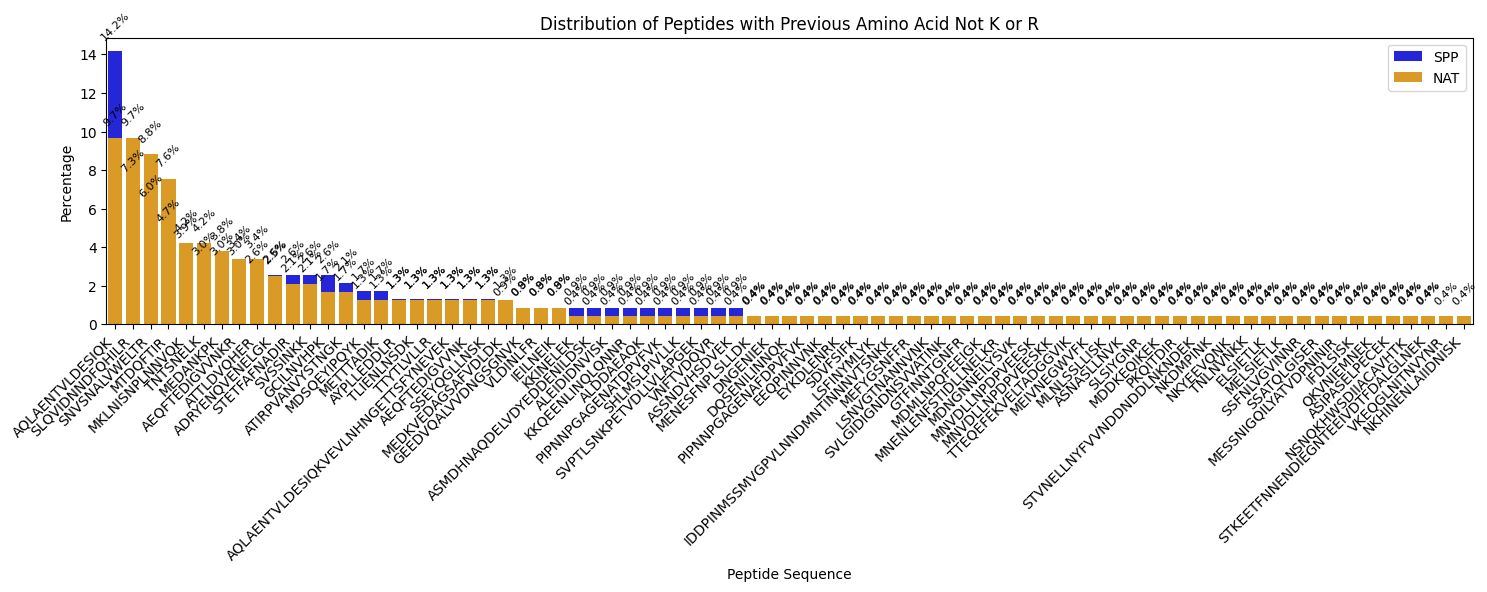

In [24]:
# Analysis to compare the distribution of peptides meeting the criteria between SPP and NAT groups. The percentages of these peptides in each group.

spp_peptide_counts = spp_data['Peptide sequence'].value_counts()
nat_peptide_counts = nat_data['Peptide sequence'].value_counts()

# Calculate and display the frequency or percentage of peptides in each group
spp_peptide_percentage = spp_peptide_counts / len(spp_data) * 100
nat_peptide_percentage = nat_peptide_counts / len(nat_data) * 100

# Plot the distribution of peptides in each group

# Set the figure size and adjust the width of the bars
plt.figure(figsize=(15, 6))
sns.barplot(x=spp_peptide_percentage.index, y=spp_peptide_percentage.values, color='blue', label='SPP', saturation=0.7)
sns.barplot(x=nat_peptide_percentage.index, y=nat_peptide_percentage.values, color='orange', label='NAT', saturation=0.7)

# Add percentage values as annotations
for i, value in enumerate(spp_peptide_percentage.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', color='black', fontsize=8, rotation=45)

for i, value in enumerate(nat_peptide_percentage.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', color='black', fontsize=8, rotation=45)

# Set the labels and title
plt.xlabel('Peptide Sequence')
plt.ylabel('Percentage')
plt.title('Distribution of Peptides with Previous Amino Acid Not K or R')
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
print(spp_peptide_counts)
print(nat_peptide_counts)

Peptide sequence
SLQVIDNNDFQHILR    33
AQLAENTVLDESIQK    17
SNVSNALVWELTR      14
ATIRPVANVYSTNGK    11
AEQFTEDIGVVNKR      9
                   ..
KINEIINKYSSNK       1
VKNLIENVEIK         1
SNIHTLAEYR          1
MEFYGSNFFR          1
TSEFWPDLDFK         1
Name: count, Length: 75, dtype: int64
Peptide sequence
AQLAENTVLDESIQK                     23
SLQVIDNNDFQHILR                     23
SNVSNALVWELTR                       21
MTDQFTIR                            18
MKLNISNPLNNVQK                      10
                                    ..
ASIPASELPECEK                        1
NSNQKHWSDIIACAVHTK                   1
STKEETFNNENDIEGNTEEIVDTFDALGLNEK     1
VKEQGLNITNVYNR                       1
NKHINENLAIIDNISK                     1
Name: count, Length: 77, dtype: int64


In [34]:
# Calculate the number of unique peptides in each group
spp_unique_peptides = set(spp_data['Peptide sequence'])
nat_unique_peptides = set(nat_data['Peptide sequence'])

# peptides not in NAT
peptides_not_in_nat = spp_unique_peptides[~spp_unique_peptides.isin(nat_unique_peptides)]

print(spp_unique_peptides)
print(peptides_not_in_nat)

AttributeError: 'set' object has no attribute 'isin'

In [33]:
# Calculate the number of unique peptides in each group
spp_unique_peptides = set(spp_data['Peptide sequence'])
nat_unique_peptides = set(nat_data['Peptide sequence'])

# peptides not in NAT
peptides_not_in_nat = spp_unique_peptides - nat_unique_peptides

print(spp_unique_peptides)
print(peptides_not_in_nat)

{'LTLTGNGK', 'MTDQFTIR', 'SSTEKNEVINSNDTR', 'MESSNIGQILYATVDPNINIR', 'SGNNVQEEDSTFHVSNLYSETEIKK', 'GALDESTPVPSR', 'SVLGIDIGNDNSVVATINK', 'MIGIQEGR', 'MNVDLLNPDPVEESKK', 'MENESFNPLSLLDK', 'AEQFTEDIGVVNK', 'SSVSTLPYIGSK', 'AQLAENTVLDESIQKVEVLNHNGETTSFYNEVEK', 'METTTADIK', 'SNVLEECIK', 'ASIPASELPECEK', 'TTYTLVLLR', 'SSEYQGLLNSK', 'VLTELGTQITNAFR', 'VAHNNVLPNVHLHK', 'ATIRPVANVYSTNGK', 'MEFYGSNFFR', 'STKEETFNNENDIEGNTEEIVDTFDALGLNEK', 'LQNNKLFDNLR', 'MNEQDYLPIEIK', 'GEEDVQALVVDNGSGNVK', 'MELSIETLK', 'QLQNITVQK', 'MEDKVEDAGSAFVDLDK', 'GCILNVHPK', 'AQLAENTVLDESIQK', 'VNFTVDQVR', 'SNIHTLAEYR', 'MNNLNILFFNNLGENILK', 'STETFAFNADIR', 'TNLNVNKK', 'ATTLDVQHER', 'MDSQEYIPQYK', 'ASNASLLNVK', 'ELSIETLK', 'MDNGNNEILYSVK', 'TNTSNELK', 'MDELNKEEIVDNINNEQAK', 'ASTEEVSQER', 'SNVSNALVWELTR', 'SVSSINKK', 'AHCTEYMNAPK', 'SNLTAAEEK', 'SQNNPLSVCVADNLINYDIQNESFR', 'EYKDLENRK', 'INNIIINK', 'SGNNVQEEDSTFHVSNLYSETEIK', 'ASMDHNAQDELVDYEDDENILDSK', 'MEDANKPK', 'MKLNISNPLNNVQK', 'GTFINNTGNFR', 'MNENLENFSTIDLLNELKR', '

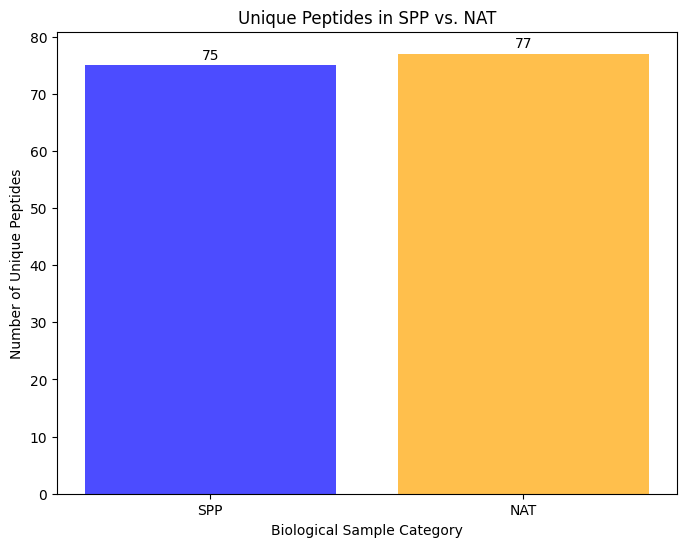

In [25]:
# Calculate the number of unique peptides in each group
spp_unique_peptides = len(set(spp_data['Peptide sequence']))
nat_unique_peptides = len(set(nat_data['Peptide sequence']))

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a bar plot for unique peptides
x = np.arange(2)
plt.bar(x, [spp_unique_peptides, nat_unique_peptides], color=['blue', 'orange'], alpha=0.7)

# Set the x-axis labels and title
plt.xticks(x, ['SPP', 'NAT'])
plt.xlabel('Biological Sample Category')
plt.ylabel('Number of Unique Peptides')
plt.title('Unique Peptides in SPP vs. NAT')

# Display the bar values
for i, v in enumerate([spp_unique_peptides, nat_unique_peptides]):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

In [29]:
# Fisher's Exact Test

# Create a contingency table of peptide counts by previous amino acid and sample category
contingency_table = pd.crosstab(data['Previous amino acid'], data['Biological sample category'])

# Filter the contingency table to include only rows for amino acids K and R, and columns for SPP and NAT
filtered_table = contingency_table.loc[['K', 'R'], ['SPP', 'NAT']]

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(filtered_table)

# Print the Fisher's exact test results
print("Fisher's Exact Test Results:")
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)


Fisher's Exact Test Results:
Odds Ratio: 0.9146692688810836
P-value: 0.006454416043428335


In [22]:
# grouped_data = filtered_data.groupby('Biological sample category')

In [23]:
# for name, group in grouped_data:
#     if name == 'SPP':
#         spp_peptides = group['Peptide sequence'].unique()
#     elif name == 'NAT':
#         nat_peptides = group['Peptide sequence'].unique()

# # Find the peptides that differ between SPP and NAT
# differing_peptides = set(spp_peptides) - set(nat_peptides)

In [25]:
# print("Peptides that differ between SPP and NAT:")
# for peptide in differing_peptides:
#     print(peptide)

Peptides that differ between SPP and NAT:
QLQNITVQK
VAHNNVLPNVHLHK
KINEIINKYSSNK
GALDESTPVPSR
SNIHTLAEYR
AEQFTEDIGVVNKRLLEPVPFVK
SGNNVQEEDSTFHVSNLYSETEIK
MNEQDYLPIEIK
MDELNKEEIVDNINNEQAK
LTLTGNGK
VLTELGTQITNAFR
SGNNVQEEDSTFHVSNLYSETEIKK
INNIIINK
SNLTAAEEK
SSTEKNEVINSNDTR
VKNLIENVEIK
AHCTEYMNAPK
TSEFWPDLDFK
PTISVYEDDLFEK
INNKYGSK
ATSEELKQLR
MIGIQEGR
ASTEEVSQER
MNNLNILFFNNLGENILK
SQNNPLSVCVADNLINYDIQNESFR
SSVSTLPYIGSK
LQNNKLFDNLR
SNVLEECIK
